In [1]:
!pip install -r /kaggle/input/bert-crfcom/bertcrfnbcom/requirements.txt -q

In [2]:
import torch.cuda
import sys
sys.path.insert(0, '/kaggle/input/bert-crfcom/bertcrfnbcom')
from re_utils.train import train_ner

In [3]:
num_labels = 63
train_tokenized_texts_path = "/kaggle/input/bert-crfcom/bertcrfnbcom/resources/data/train/train_processed_id_50.jsonl"
test_tokenized_texts_path = "/kaggle/input/bert-crfcom/bertcrfnbcom/resources/data/test/test_processed_id.jsonl"
dropout = 0.2
batch_size = 32
epochs = 3
log_every = 100
lr_new_layers = 1e-3
lr_bert = 1e-5
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


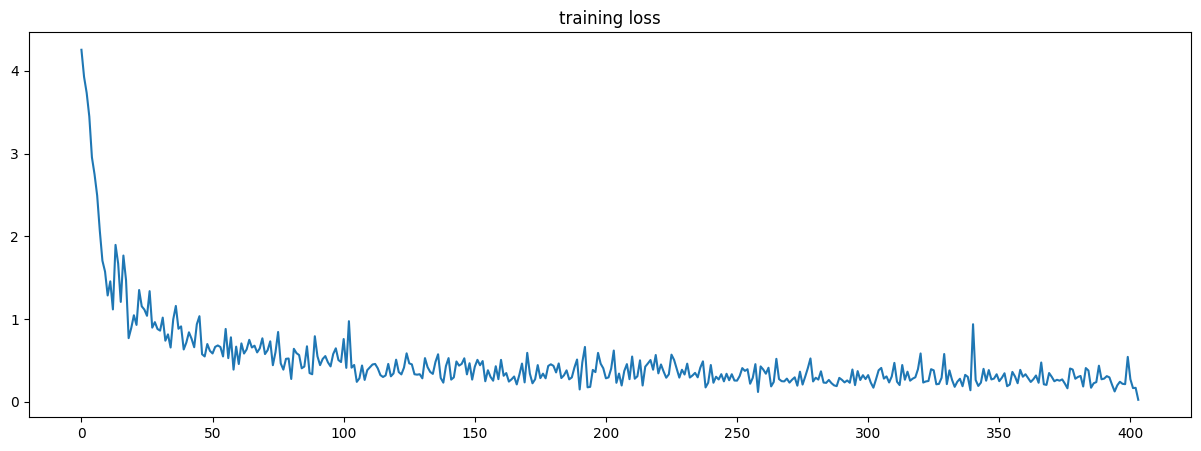

Current loss: 0.024738293141126633
f1_micro: [0.9414458468477103]
f1_macro: [0.4126382569823224]
mcc: [0.8113220820964809]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      0.55      0.68       359
           1       0.60      0.69      0.64      3609
           2       0.00      0.00      0.00       723
           3       0.00      0.00      0.00       209
           4       0.93      0.93      0.93      8621
           5       0.70      0.66      0.68       428
           6       0.79      0.25      0.38       607
           7       0.77      0.61      0.68       342
           8       0.62      0.01      0.02       516
           9       0.00      0.00      0.00       435
          10       0.00      0.00      0.00        59
          11       0.39      0.61      0.47       607
          12       0.79      0.78      0.78      3452
          13       0.40      0.47      0.44      5259
          14       0.34      0.34      0.34       180
          15       0.31      0.43      0.36      1102
          16       0.76      0.31      0.44      2256
          17       1.00    

In [4]:
# bert-base-cased w/o crf

train_ner(
    num_labels=num_labels,
    bert_name="bert-base-cased",
    train_tokenized_texts_path=train_tokenized_texts_path,
    test_tokenized_texts_path=test_tokenized_texts_path,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    log_every=log_every,
    lr_new_layers=lr_new_layers,
    lr_bert=lr_bert,
    use_crf=False,
    save_to=None,
    device=device
)

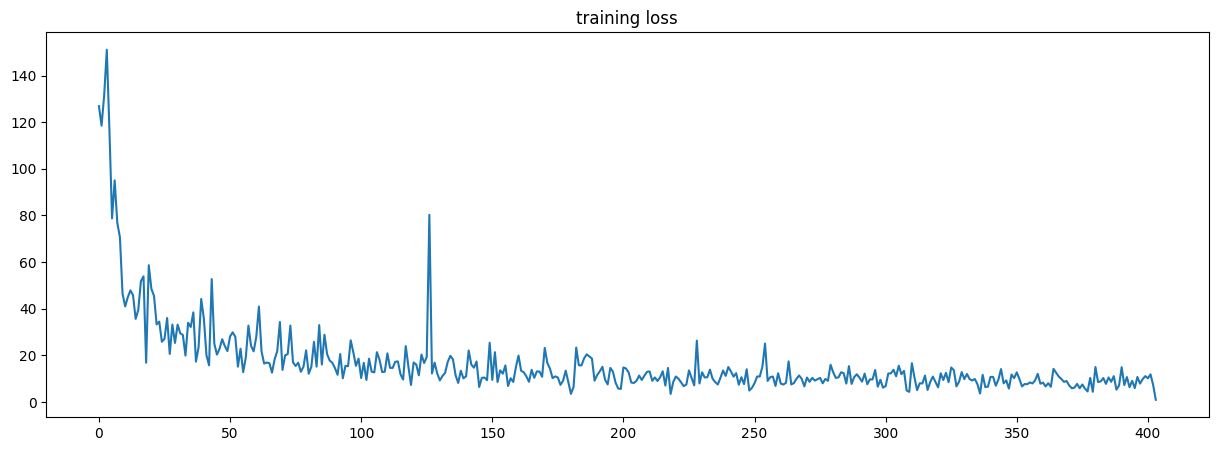

Current loss: 0.9381504058837891
f1_micro: [0.9406652941563622]
f1_macro: [0.4193016289715413]
mcc: [0.8076793177325252]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      0.50      0.66       359
           1       0.67      0.59      0.63      3609
           2       0.27      0.12      0.16       723
           3       0.00      0.00      0.00       209
           4       0.91      0.94      0.92      8621
           5       0.99      0.37      0.54       428
           6       0.60      0.44      0.50       607
           7       0.72      0.64      0.68       342
           8       0.64      0.03      0.05       516
           9       0.00      0.00      0.00       435
          10       0.00      0.00      0.00        59
          11       0.54      0.52      0.53       607
          12       0.89      0.67      0.77      3452
          13       0.43      0.37      0.40      5259
          14       0.79      0.24      0.37       180
          15       0.51      0.09      0.15      1102
          16       0.71      0.70      0.71      2256
          17       0.50    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# bert-base-cased + crf

train_ner(
    num_labels=num_labels,
    bert_name="bert-base-cased",
    train_tokenized_texts_path=train_tokenized_texts_path,
    test_tokenized_texts_path=test_tokenized_texts_path,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    log_every=log_every,
    lr_new_layers=lr_new_layers,
    lr_bert=lr_bert,
    use_crf=True,
    save_to=None,
    device=device
)